In [4]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

For when doing GPU work

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-10-30 21:05:00.714063: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-30 21:05:01.071530: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-30 21:05:01.071596: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.


# **IPPR CNN Model**

### **Setting up Data**

Import image data from dataset containing 20000 positive images and 20000 negative images with each image being 227 x 227 pixels large. Kaggle link: https://www.kaggle.com/datasets/arnavr10880/concrete-crack-images-for-classification/data

In [7]:
data = tf.keras.utils.image_dataset_from_directory('Data', image_size=(256, 256), batch_size=64)

Found 20000 files belonging to 2 classes.


In [8]:
data = data.map(lambda x,y: (x/255,y))

Shuffle the dataset before splitting the data into training, testing and validation sets.

In [9]:
shuffled_data = data.shuffle(buffer_size=50, reshuffle_each_iteration=False)

Splitting the dataset into training, testining and validation sets.

In [10]:
training_split_size = int(len(data)*.7)
testing_split_size = int(len(data)*.15)
validation_split_size = int(len(data)*.15)

In [11]:
training_set = shuffled_data.take(training_split_size)
testing_set = shuffled_data.skip(training_split_size).take(testing_split_size)
validation_set = shuffled_data.skip(training_split_size+testing_split_size).take(validation_split_size)

### **Model Building**

In [12]:
model = Sequential()

model.add(tf.keras.Input(shape=(256,256,3)))
model.add(Conv2D(32, 9, strides = 1, activation = 'relu')) 
model.add(Conv2D(16, 7, strides = 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, 3, strides = 1, activation = 'relu')) 
model.add(Conv2D(16, 3, strides = 1, activation = 'relu')) 
model.add(MaxPooling2D())

model.add(tf.keras.layers.GlobalMaxPooling2D())

model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

### **Compiling Model**

In [13]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      7808      
                                                                 
 conv2d_1 (Conv2D)           (None, 242, 242, 16)      25104     
                                                                 
 max_pooling2d (MaxPooling2  (None, 121, 121, 16)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 119, 119, 16)      2320      
                                                                 
 conv2d_3 (Conv2D)           (None, 117, 117, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 58, 58, 16)        0         
 g2D)                                                   

In [15]:
hist = model.fit(training_set, epochs = 25, validation_data = validation_set)

Epoch 1/25


2024-10-30 21:05:37.103928: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-10-30 21:05:41.758237: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-30 21:05:41.804885: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f3d63d2c440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-30 21:05:41.804940: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-10-30 21:05:41.833759: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-30 21:05:42.052272: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

219/219 [==============================] - 55s 185ms/step - loss: 0.3239 - accuracy: 0.8708 - val_loss: 0.2724 - val_accuracy: 0.8939
Epoch 2/25
219/219 [==============================] - 40s 179ms/step - loss: 0.2386 - accuracy: 0.9107 - val_loss: 0.2526 - val_accuracy: 0.9014
Epoch 3/25
219/219 [==============================] - 40s 181ms/step - loss: 0.2189 - accuracy: 0.9136 - val_loss: 0.2158 - val_accuracy: 0.9131
Epoch 4/25
219/219 [==============================] - 40s 181ms/step - loss: 0.2039 - accuracy: 0.9157 - val_loss: 0.1859 - val_accuracy: 0.9176
Epoch 5/25
219/219 [==============================] - 39s 176ms/step - loss: 0.1875 - accuracy: 0.9206 - val_loss: 0.1766 - val_accuracy: 0.9207
Epoch 6/25
219/219 [==============================] - 40s 180ms/step - loss: 0.1747 - accuracy: 0.9237 - val_loss: 0.2421 - val_accuracy: 0.8880
Epoch 7/25
219/219 [==============================] - 41s 182ms/step - loss: 0.1729 - accuracy: 0.9219 - val_loss: 0.1626 - val_accuracy: 0.9

### **Plotting and Presenting Results**

Plotting training and validation loss

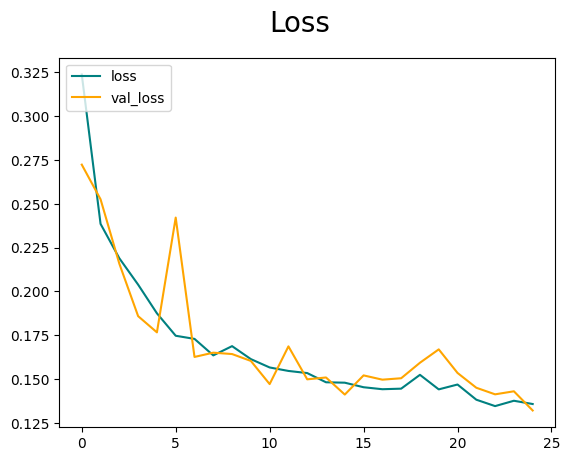

In [16]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Plotting training and validation accuracy

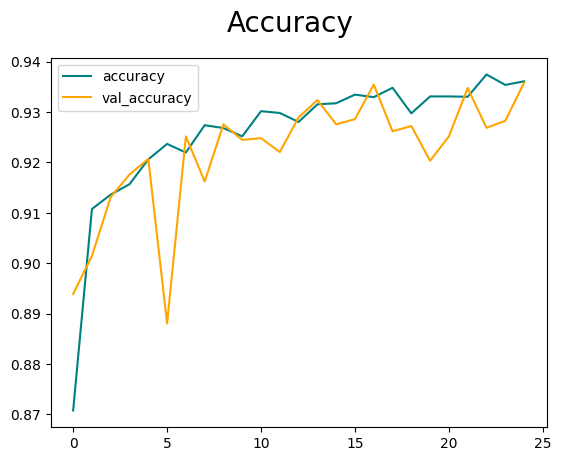

In [17]:
fig2 = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig2.suptitle("Accuracy", fontsize = 20)
plt.legend(loc="upper left")
plt.show()